Input: current Metro Plan
Ouput: centroids closest to them by distance 

Centroid 0: Nearest NS_locs index: [[8]]
Centroid 1: Nearest NS_locs index: [[12]]
Centroid 2: Nearest NS_locs index: [[5]]
Centroid 3: Nearest NS_locs index: [[11]]
Centroid 4: Nearest NS_locs index: [[0]]
Centroid 5: Nearest NS_locs index: [[0]]
Centroid 6: Nearest NS_locs index: [[8]]
Centroid 7: Nearest NS_locs index: [[0]]
Centroid 8: Nearest NS_locs index: [[0]]
Centroid 9: Nearest NS_locs index: [[12]]
Centroid 10: Nearest NS_locs index: [[13]]
Centroid 11: Nearest NS_locs index: [[9]]
Centroid 12: Nearest NS_locs index: [[0]]
Centroid 13: Nearest NS_locs index: [[0]]
Centroid 14: Nearest NS_locs index: [[0]]
Centroid 15: Nearest NS_locs index: [[0]]
Centroid 16: Nearest NS_locs index: [[0]]
Centroid 17: Nearest NS_locs index: [[0]]
Centroid 18: Nearest NS_locs index: [[0]]
Centroid 19: Nearest NS_locs index: [[0]]
Centroid 20: Nearest NS_locs index: [[0]]
Centroid 21: Nearest NS_locs index: [[0]]
Centroid 22: Nearest NS_locs index: [[0]]
Centroid 23: Nearest NS_locs index: [[0]

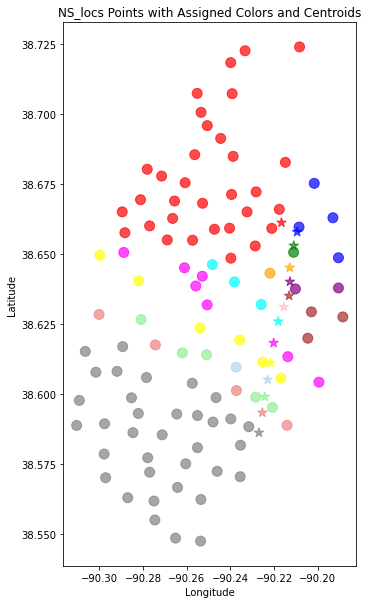

In [53]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import BallTree

# Read centroids and NS_locs shapefiles
centroids = gpd.read_file(r"data\Centroids.shp")
NS_locs = gpd.read_file(r"data\MetrolinkStations_NS_Shapefiles\MetrolinkStations_NS.shp")

# Generate a list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta', 'yellow', 'lightblue', 'lightgreen', 'lightcoral', 'gray']

# Add a 'color' column to NS_locs with different colors for each point
NS_locs['color'] = colors

# Initialize an empty 'color' column in centroids
centroids['color'] = ''

# Get NS_locs points as an array for BallTree
NS_locs_points = np.array([[point.x, point.y] for point in NS_locs['geometry']])

# Build BallTree for NS_locs
NS_locs_tree = BallTree(NS_locs_points, metric='haversine')

# Iterate through centroids and find the nearest NS_locs point
for idx, row in centroids.iterrows():
    centroid_coords = np.array([[row['geometry'].x, row['geometry'].y]])
    distances, nearest_NS_locs_idx = NS_locs_tree.query(centroid_coords, k=1)
    print(f"Centroid {idx}: Nearest NS_locs index: {nearest_NS_locs_idx}")
    
    # Check if nearest_NS_locs_idx is valid and within bounds
    if nearest_NS_locs_idx.size > 0 and nearest_NS_locs_idx[0] < len(NS_locs):
        nearest_NS_loc_color = NS_locs.loc[nearest_NS_locs_idx[0], 'color']
        centroids.at[idx, 'color'] = nearest_NS_loc_color
    else:
        centroids.at[idx, 'color'] = 'black'  # Handle case where nearest NS_locs point is not found or index is out of bounds

# Convert 'color' column in centroids to a list of colors
centroid_colors = centroids['color'].tolist()

# Plot NS_locs points with colors based on nearest centroids
ax = NS_locs.plot(markersize=100, alpha=0.7, figsize=(10, 10), legend=True, marker='*', c=NS_locs['color'])

centroid_colors = centroids['color'].tolist()

# Flatten the nested list of colors
centroid_colors_flat = [color for sublist in centroid_colors for color in sublist]

# Plot centroids with marker colors based on the 'color' column
centroids.plot(ax=ax, markersize=100, alpha=0.7, marker='o', c=centroid_colors_flat, legend=True)
# Set plot title and labels
ax.set_title('NS_locs Points with Assigned Colors and Centroids')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()
